In [20]:
import cv2
import os
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
# Python code for merging ground masks

# labels = [HE,EX,MA] , 0 means background
labels=[1,2,3]



#Given an image mask, assign it a particular label

def label_gen(val,img):  
    return np.where(img>0, val, img)

# Uncomment below for train
# Get input image paths

train_dir = os.path.join(os.path.abspath('..'),'data','train')

# Current folder is UNet-Revisited/notebooks

path1 = os.path.join(train_dir,'masks_Haemorrhages')
f_path1= os.listdir(path1)
path2 = os.path.join(train_dir,'masks_Hard_Exudates')
f_path2= os.listdir(path2)
path3 = os.path.join(train_dir,'masks_Microaneurysms')
f_path3= os.listdir(path3)

# Newly created masks folder
out= os.path.join(train_dir,'masks_new')

names=[([],f_path1,path1),([],f_path2,path2),([],f_path3,path3)]


for temp,path,name in names:
    f_path=path
    p_val=iter(f_path)
    p=next(p_val)
    for i in range(1,55): 
        if(int(p[6:8]))==i:
            s=os.path.join(name,p)
            #print(s)
            temp.append(f'{s}')
            #print(temp)
            if(int(p[6:8])<54):
                p=next(p_val)
        else:
            temp.append('')

# Contains all input paths        
image_paths=np.column_stack((names[0][0],names[1][0],names[2][0]))


# # Get input image paths

# test_dir = os.path.join(os.path.abspath('..'),'data','test')

# # Current folder is UNet-Revisited/notebooks

# path1 = os.path.join(test_dir,'masks_Haemorrhages')
# f_path1= sorted(glob.glob(os.path.join(path1,'*.tif')))
# path2 = os.path.join(test_dir,'masks_Hard_Exudates')
# f_path2= sorted(glob.glob(os.path.join(path2,'*.tif')))
# path3 = os.path.join(test_dir,'masks_Microaneurysms')
# f_path3= sorted(glob.glob(os.path.join(path3,'*.tif')))

# # Newly created masks folder
# out= os.path.join(test_dir,'masks_new')


            
# # Contains all input paths        
# image_paths=np.column_stack((f_path1,f_path2,f_path3))

 
    

In [24]:
# Merge multiple masks into one for every input image

for j,img_path in enumerate(image_paths):
    
    # Temporary array containing all colored image masks for a particular image
    array_images=[]
    
    for i,image in enumerate(img_path):
        if image:
            img=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
            array_images.append(label_gen(labels[i],img))    
    final=np.maximum.reduce(array_images).astype(np.uint8)
    
    #Combine into single image  
    #name='IDRiD_'+str(j+55)+'.png'
    #for train
    if len(str(j+1)) ==1:
        
        name='IDRiD_0'+str(j+1)+'.png' 
    else:
        name='IDRiD_'+str(j+1)+'.png'
    out_name=os.path.join(out,name)
    cv2.imwrite(out_name,final,[cv2.IMWRITE_PNG_COMPRESSION, 0])   

In [ ]:
# #Python code for merging ground masks 

# #Color coding for new masks
# #Normal - Black(0,0,0)
# #HE - Blue(0,128,192)
# #EX - Red(128,0,0)
# #MA - Yellow(192,192,0)
# #SE - Green(64,192,0)
# ##Note these color names are just visual guides
# colors=[(0,128,192) , (128,0,0) , (192,192,0), (64,192,0)]
# #colors=[1,2,3,4]
# #Given an image mask, assign it a particular color
# def coloring(r_val,g_val,b_val,img):
#     b=np.where(img>0, b_val, img)
#     g=np.where(img>0, g_val, img)
#     r=np.where(img>0, r_val, img)
#     return cv2.merge((b,g,r))
# #def coloring(val,img):  
#     #return np.where(img>0, val, img)
# #Get input image paths
# #Current folder is Train
# path1 = os.path.join(os.getcwd(),'masks_Haemorrhages')
# f_path1= os.listdir(path1)
# path2 = os.path.join(os.getcwd(),'masks_Hard_Exudates')
# f_path2= os.listdir(path2)
# path3 = os.path.join(os.getcwd(),'masks_Microaneurysms')
# f_path3= os.listdir(path3)
# path4 = os.path.join(os.getcwd(),'masks_Soft_Exudates')
# f_path4= os.listdir(path4)

# #Newly created masks folder
# out= os.path.join(os.getcwd(),'colored_masks')

# names=[([],f_path1,path1),([],f_path2,path2),([],f_path3,path3),([],f_path4,path4)]

# for temp,path,name in names:
#     f_path=path
#     p_val=iter(f_path)
#     p=next(p_val)
#     for i in range(1,55): 
#         if(int(p[6:8]))==i:
#             s=os.path.join(name,p)
#             #print(s)
#             temp.append(f'{s}')
#             #print(temp)
#             if(int(p[6:8])<54):
#                 p=next(p_val)
#         else:
#             temp.append('')

# #Contains all input paths        
# image_paths=np.column_stack((names[0][0],names[1][0],names[2][0],names[3][0]))

 
    

In [ ]:
# #Merge multiple masks into one for every input image
# for j,img_path in enumerate(image_paths):
#     #Temporary array containing all colored image masks for a particular image
#     array_images=[]
#     for i,image in enumerate(img_path):
#         if image:
#             img=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
#             array_images.append(coloring(*colors[i],img))    
#     final=np.maximum.reduce(array_images).astype(np.uint8)
#     #print(np.count_nonzero(final == 1),np.count_nonzero(final == 2),np.count_nonzero(final == 3),np.count_nonzero(final == 4))
#     #Combine into single image  
#     name='IDRiD_'+str(j+1)+'.tif'
#     out_name=os.path.join(out,name)
#     cv2.imwrite(out_name,final)   

In [3]:
# # Preprocessing (Optional)




# def reduce_resolution(image, size):
#     dim = (size, size)
#     resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
#     print('Re-sized Dimensions : ', resized_image.shape)
#     return resized_image


# def scaleradius(img, scale):
#     x = img[int(img.shape[0] / 2), :, :].sum(1)
#     r = (x > x.mean() / 10).sum() / 2
#     s = scale * 1.0 / r
#     return cv2.resize(img, (0, 0), fx=s, fy=s)


# def normalization(image):
#     image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), 100), -4, 128)
#     return image


# def enhance(image, clip_limit=1):
#     # convert image to LAB color model
#     image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#     # split the image into L, A, and B channels
#     l_channel, a_channel, b_channel = cv2.split(image_lab)

#     # apply CLAHE to lightness channel
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(8, 8))
#     cl = clahe.apply(l_channel)

#     # merge the CLAHE enhanced L channel with the original A and B channel
#     merged_channels = cv2.merge((cl, a_channel, b_channel))

#     # convert image from LAB color model back to BGR color model
#     final_image = cv2.cvtColor(merged_channels, cv2.COLOR_LAB2BGR)
#     return final_image


# #image = cv2.imread(os.path.join(utils.get_train_dir(), "images", "IDRiD_02.tif"))
# image = cv2.imread('../data/Train/original_retinal_images/IDRiD_01.jpg')
# print(type(image.shape))
# # path=os.path.join()
# # images = utils.read_images_from_folder(args.model_category, args.directory, args.image_format)
# # print(len(images))

# image = scaleradius(image, 300)
# image = normalization(image)
# print(image.shape)
# image = enhance(image)
# cv2.imshow('image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<class 'tuple'>
(485, 731, 3)


In [2]:
def read_image(image_name):
    return cv2.imread(image_name, cv2.IMREAD_UNCHANGED)


def display_image(image):
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def save_image(file_name, image):
    cv2.imwrite(file_name + ".jpg", image)

In [35]:
path = os.path.join(os.path.abspath('..'),'data','train','masks_Haemorrhages','IDRiD_17_HE.tif')

x= cv2.imread(path,cv2.IMREAD_UNCHANGED)

x.shape

(2848, 4288)

In [36]:
np.unique(x,return_counts=True)

(array([ 0, 76], dtype=uint8), array([10390902,  1821322], dtype=int64))

In [25]:
mask = os.path.join(os.path.abspath('..'),'data','train','masks_new','IDRiD_17.png')

x= read_image(mask)

x.shape

(2848, 4288)

In [10]:
channels = len(np.unique(x))

In [12]:
#number of categories

img_cat = np.eye(channels)[x]

In [13]:
img_cat.shape

(2848, 4288, 4)

In [14]:
background = img_cat[:,:,0]


In [18]:
np.unique(background,return_counts=True)

(array([0., 1.]), array([ 2036827, 10175397], dtype=int64))

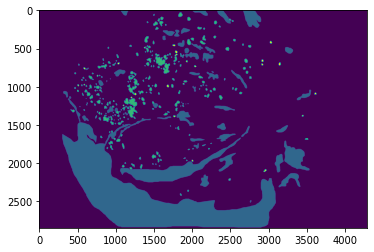

In [26]:
plt.imshow(x)

In [27]:
y=np.eye(4)[x]

In [29]:
y.shape

(2848, 4288, 4)

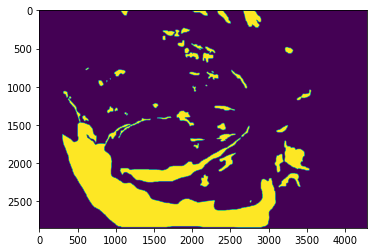

In [30]:
plt.imshow(y[:,:,1])